# Parameters Sweep Analysis

In [1]:
import evol_dynamics

In [2]:
import pandas as pd
import dask.dataframe as dd

import numpy as np
import tqdm
import itertools

In [3]:
import matplotlib.pyplot as plt
import matplotlib

cmaps = [matplotlib.cm.get_cmap("Blues"), matplotlib.cm.get_cmap("Reds")]

from mpl_toolkits.axes_grid1 import make_axes_locatable

In [4]:
import glob

**Clean data**

In [5]:
in_columns = ["y", "p", "q", "average cooperation rate", "average score", "t"]

In [6]:
csv_files = glob.glob('matlab/data/expected/S*csv')

In [7]:
for file in tqdm.tqdm_notebook(csv_files):    
    df = pd.read_csv(file, header=None)
    df = df.drop_duplicates()
    df.columns = in_columns
    
    frequencies = []
    previous = 0
    for value in df['t'][1:]:
        frequencies.append(value - previous)
        previous = value
    frequencies.append(10 ** 7 - previous)
    
    df['frequencies'] = frequencies
    
    df.to_csv(f"matlab/data/expected/clean_{file[21:]}", index=False)

/Users/glynatsi/opt/anaconda3/envs/stochastic-payoffs/lib/python3.7/site-packages/ipykernel_launcher.py:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """Entry point for launching an IPython kernel.


**Generate individual plots - for each trial**

In [11]:
columns = ["y", "p", "q", "average cooperation rate", "average score", "t", "f"]

In [12]:
font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 13,
        }

In [10]:
# csv_files = glob.glob('matlab/data/expected/clean_*')
# for file in tqdm.notebook.tqdm(csv_files):
    
#     df = pd.read_csv(file, dtype=np.float64)
    
#     text_file = open((file[:21] + file[27:]).replace("csv", "txt"), "r")
#     data = text_file.readlines()
    
    
#     mean_cooperation = sum(df['average cooperation rate'] * (df['frequencies'] / 10 ** 7))
#     mean_score = sum(df['average score'] * (df['frequencies'] / 10 ** 7))
#     title = data[0].replace('\n', '')
    
#     ps = []
#     qs = []
#     for p, q, v in zip(df["p"], df["q"], df["frequencies"]):
#         for _ in range(int(v)):
#             ps.append(p)
#             qs.append(q)
    
#     fig, axes = plt.subplots(figsize=(10, 7));

#     heatmap, xedges, yedges = np.histogram2d(ps, qs, bins=15)

#     extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

#     im = axes.imshow(heatmap.T, extent=extent, cmap=cmaps[0], origin="lower")

#     divider = make_axes_locatable(axes)
#     cax = divider.append_axes('right', size='5%', pad=0.05)
#     fig.colorbar(im, cax=cax, orientation='vertical')
#     title = data[0].replace("\n", "")
#     axes.set_title(title)

#     axes.set_xticks(np.linspace(0, 1, 2))
#     axes.set_yticks(np.linspace(0, 1, 2))

#     axes.text(.2, .9, f'mean cooperation: {round(mean_cooperation, 3)}', fontdict=font)
#     axes.text(.2, .85, f'mean score: {round(mean_score, 3)}', fontdict=font)


#     fig.savefig(f'matlab/images/{title}.pdf')
#     plt.close(); 

**Generate plot across axis**

In [13]:
Ss = [2, 1.6, 1.2, 0.8, 0.4, 0, -0.4, -0.8, -1.2, -1.6, -2]
Ts = [-1, -0.6, -0.2,  0.2,  0.6,  1,  1.4,  1.8,  2.2,  2.6,  3]

In [14]:
sorted_cvs_files_expected = [f"matlab/data/expected/clean_S_{S}_T_{T}_stochastic_0.csv" for S in Ss for T in Ts]

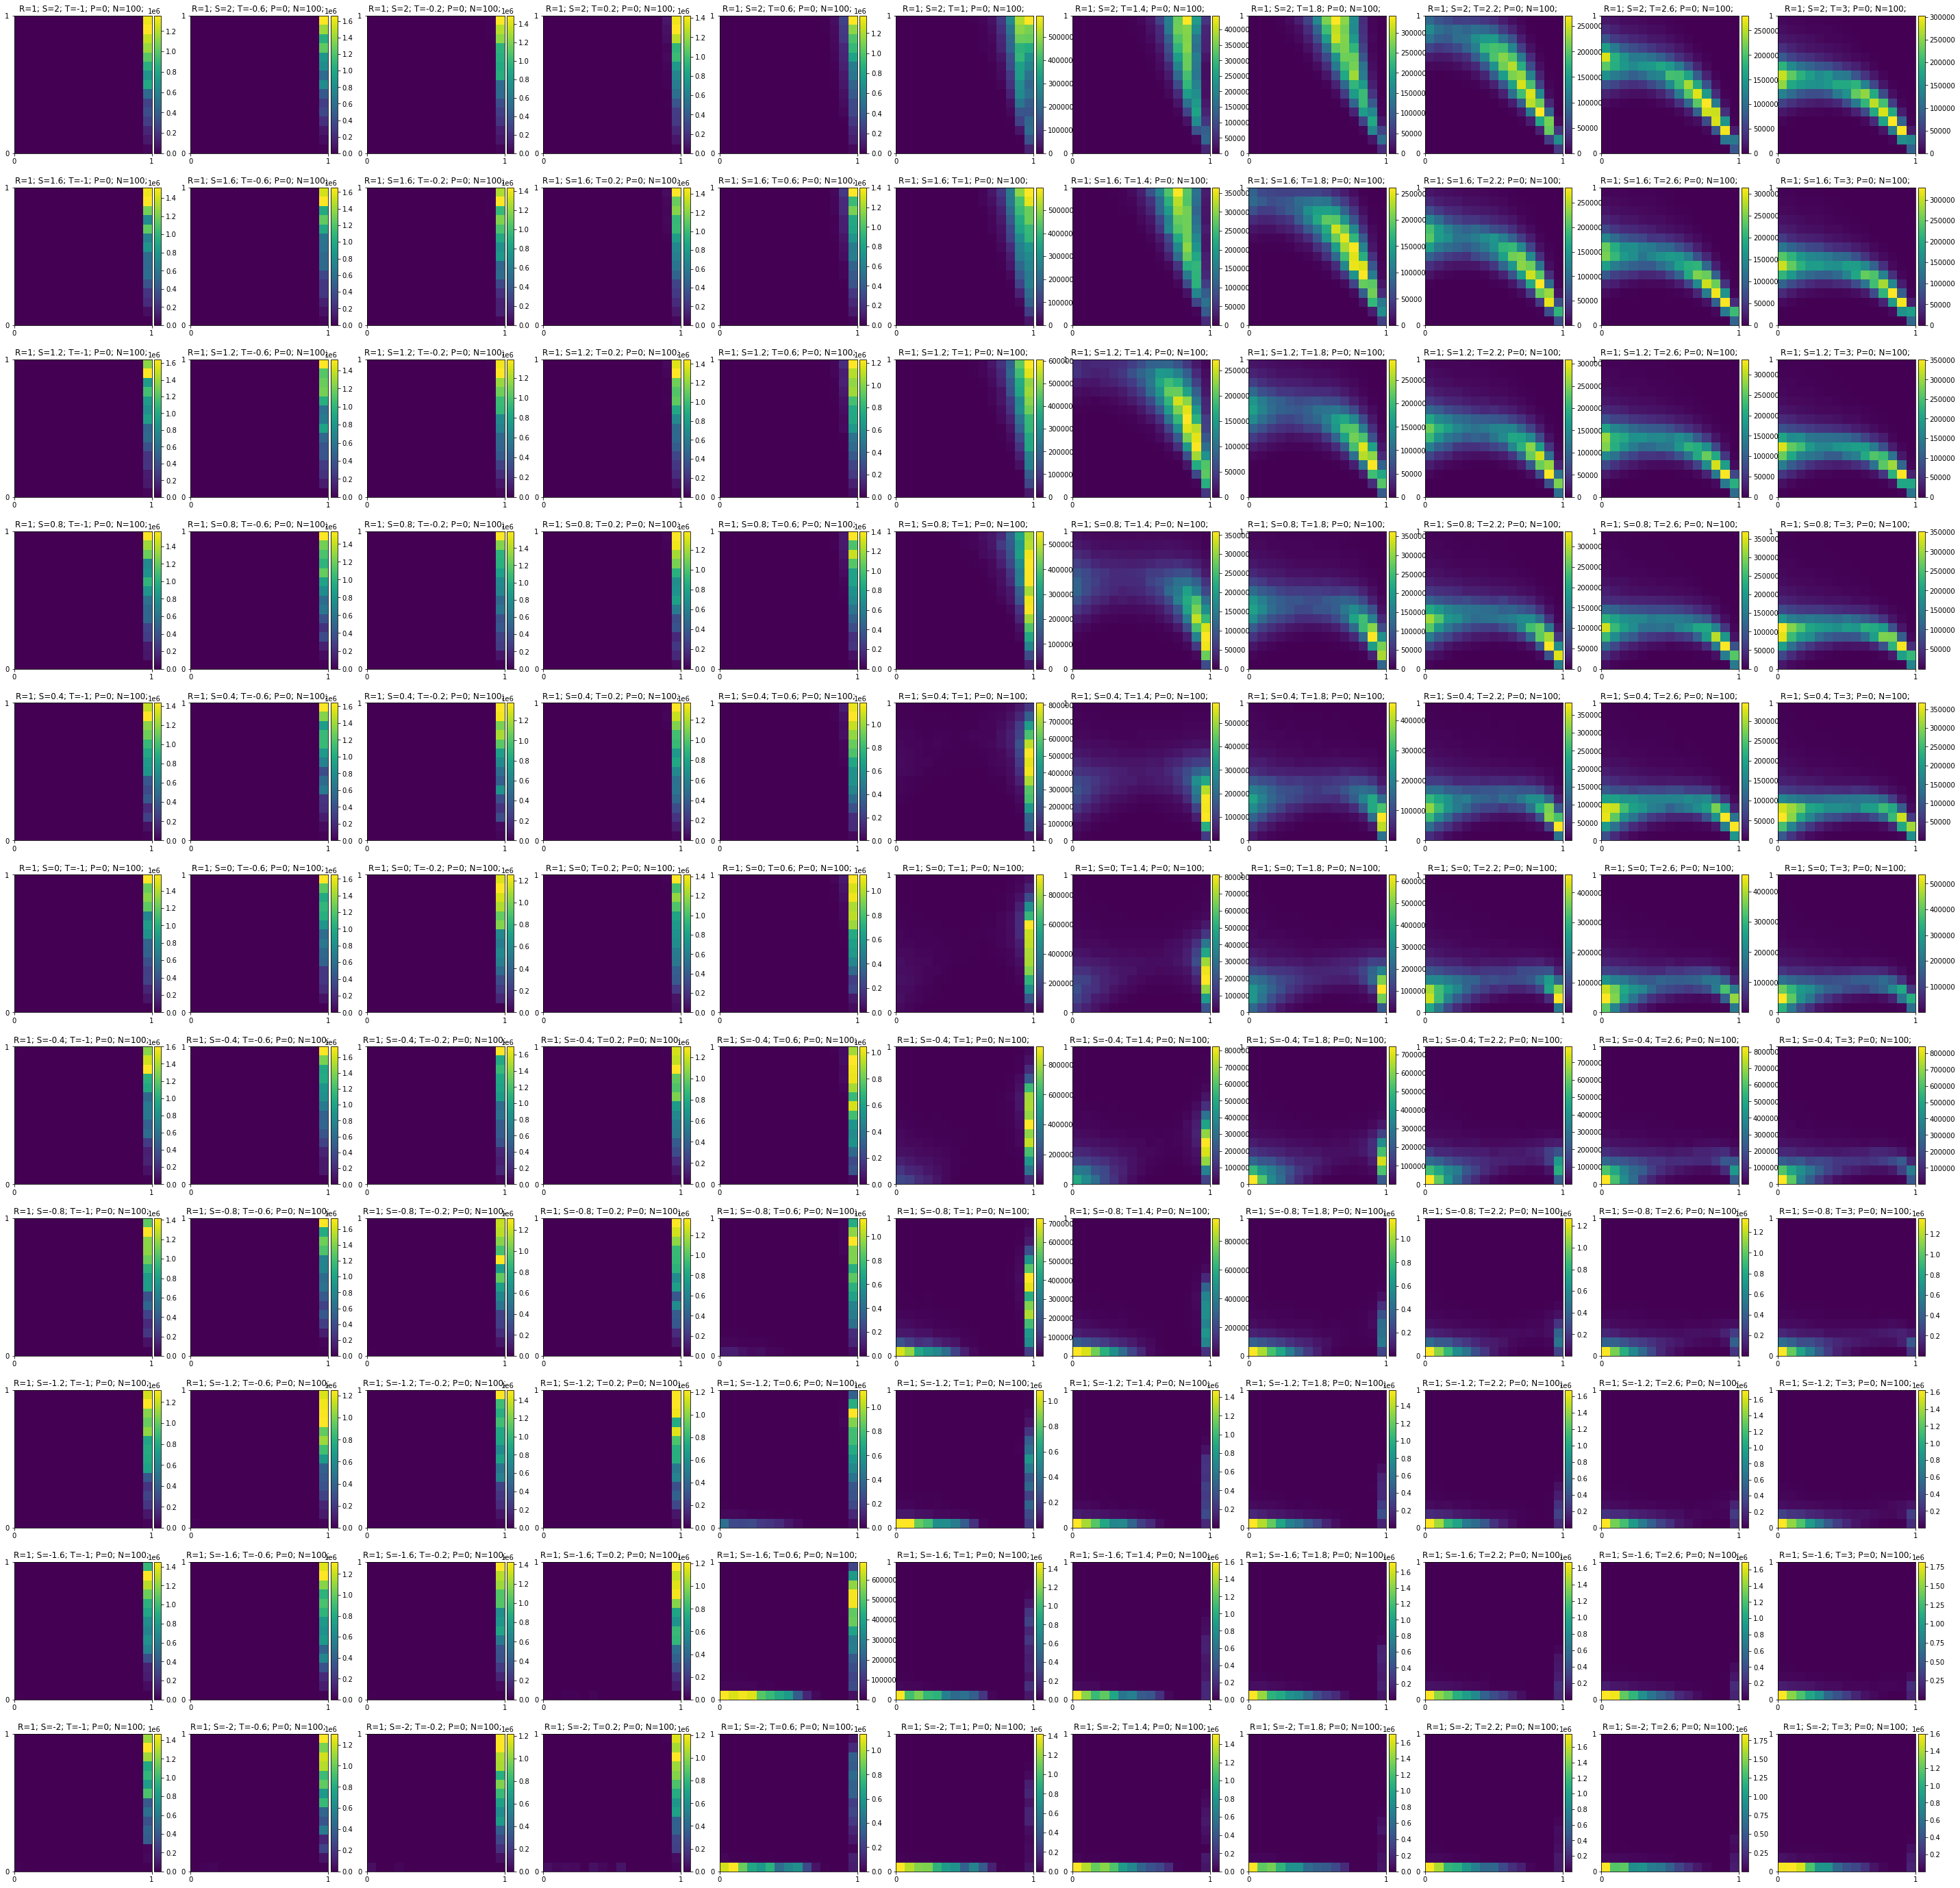

In [16]:
fig, axes = plt.subplots(nrows=11, ncols=11, figsize=(50, 50));

for i, file in enumerate(sorted_cvs_files_expected):
    
    df = pd.read_csv(file, dtype=np.float64)
    
    text_file = open((file[:21] + file[27:]).replace("csv", "txt"), "r")
    data = text_file.readlines()
    
    ps, qs = [], []
    for p, q, v in zip(df["p"], df["q"], df["frequencies"]):
        for _ in range(int(v)):
            ps.append(p)
            qs.append(q)
    
    title = data[0].replace(",", "")[:-35]
    
    index = (int(i / 11), i % 11)
    
    heatmap, xedges, yedges = np.histogram2d(ps, qs, bins=15)

    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

    im = axes[index].imshow(heatmap.T, extent=extent, origin="lower")

    divider = make_axes_locatable(axes[index])
    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(im, cax=cax, orientation='vertical')
    axes[index].set_title(title)

    axes[index].set_xticks(np.linspace(0, 1, 2))
    axes[index].set_yticks(np.linspace(0, 1, 2))
        
fig.savefig("matlab/images/merged_plot.pdf")

In [14]:
cooperation_rates_expected = np.zeros((11, 11))
scores_expected = np.zeros((11, 11))

In [16]:
for i, file in enumerate(sorted_cvs_files_expected):
    x = int(i / 11)
    y = i % 11
    
    df = pd.read_csv(file)
    
    cooperation_rates_expected[int(x), int(y)] = sum(df['average cooperation rate'] * (df['frequencies'] / 10 ** 7))
    scores_expected[x, y] = sum(df['average score'] * (df['frequencies'] / 10 ** 7))

In [ ]:
cooperation_rates_expected - co

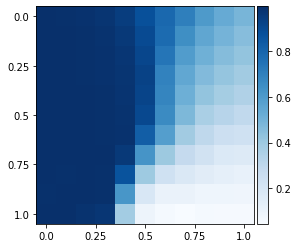

In [33]:
fig, axes = plt.subplots()

im = axes.imshow(cooperation_rates_expected, cmap=cmaps[0])

axes.set_xticks(np.linspace(0, 10, 5))
axes.set_yticks(np.linspace(0, 10, 5))

axes.set_xticklabels(np.linspace(0, 1, 5))
axes.set_yticklabels(np.linspace(0, 1, 5))



divider = make_axes_locatable(axes)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im, cax=cax, orientation='vertical');


In [ ]:
# similar can be done for scores

**Similar for stochastic payoffs**

In [5]:
csv_files = glob.glob('matlab/data/stochastic/*csv')

In [16]:
for file in tqdm.tqdm_notebook(csv_files):    
    df = pd.read_csv(file, header=None)
    df = df.drop_duplicates()
    df.columns = columns
    
    frequencies = []
    previous = 0
    for value in df['t'][1:]:
        frequencies.append(value - previous)
        previous = value
    frequencies.append(10 ** 7 - previous)
    
    df['frequencies'] = frequencies
    
    df.to_csv(f"matlab/data/stochastic/clean_{file[23:]}", index=False)

/Users/glynatsi/opt/anaconda3/envs/stochastic-payoffs/lib/python3.7/site-packages/ipykernel_launcher.py:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """Entry point for launching an IPython kernel.


In [19]:
sorted_cvs_files_stochastic = [f"matlab/data/stochastic/clean_S_{S}_T_{T}_stochastic_1.csv" for S in Ss for T in Ts]

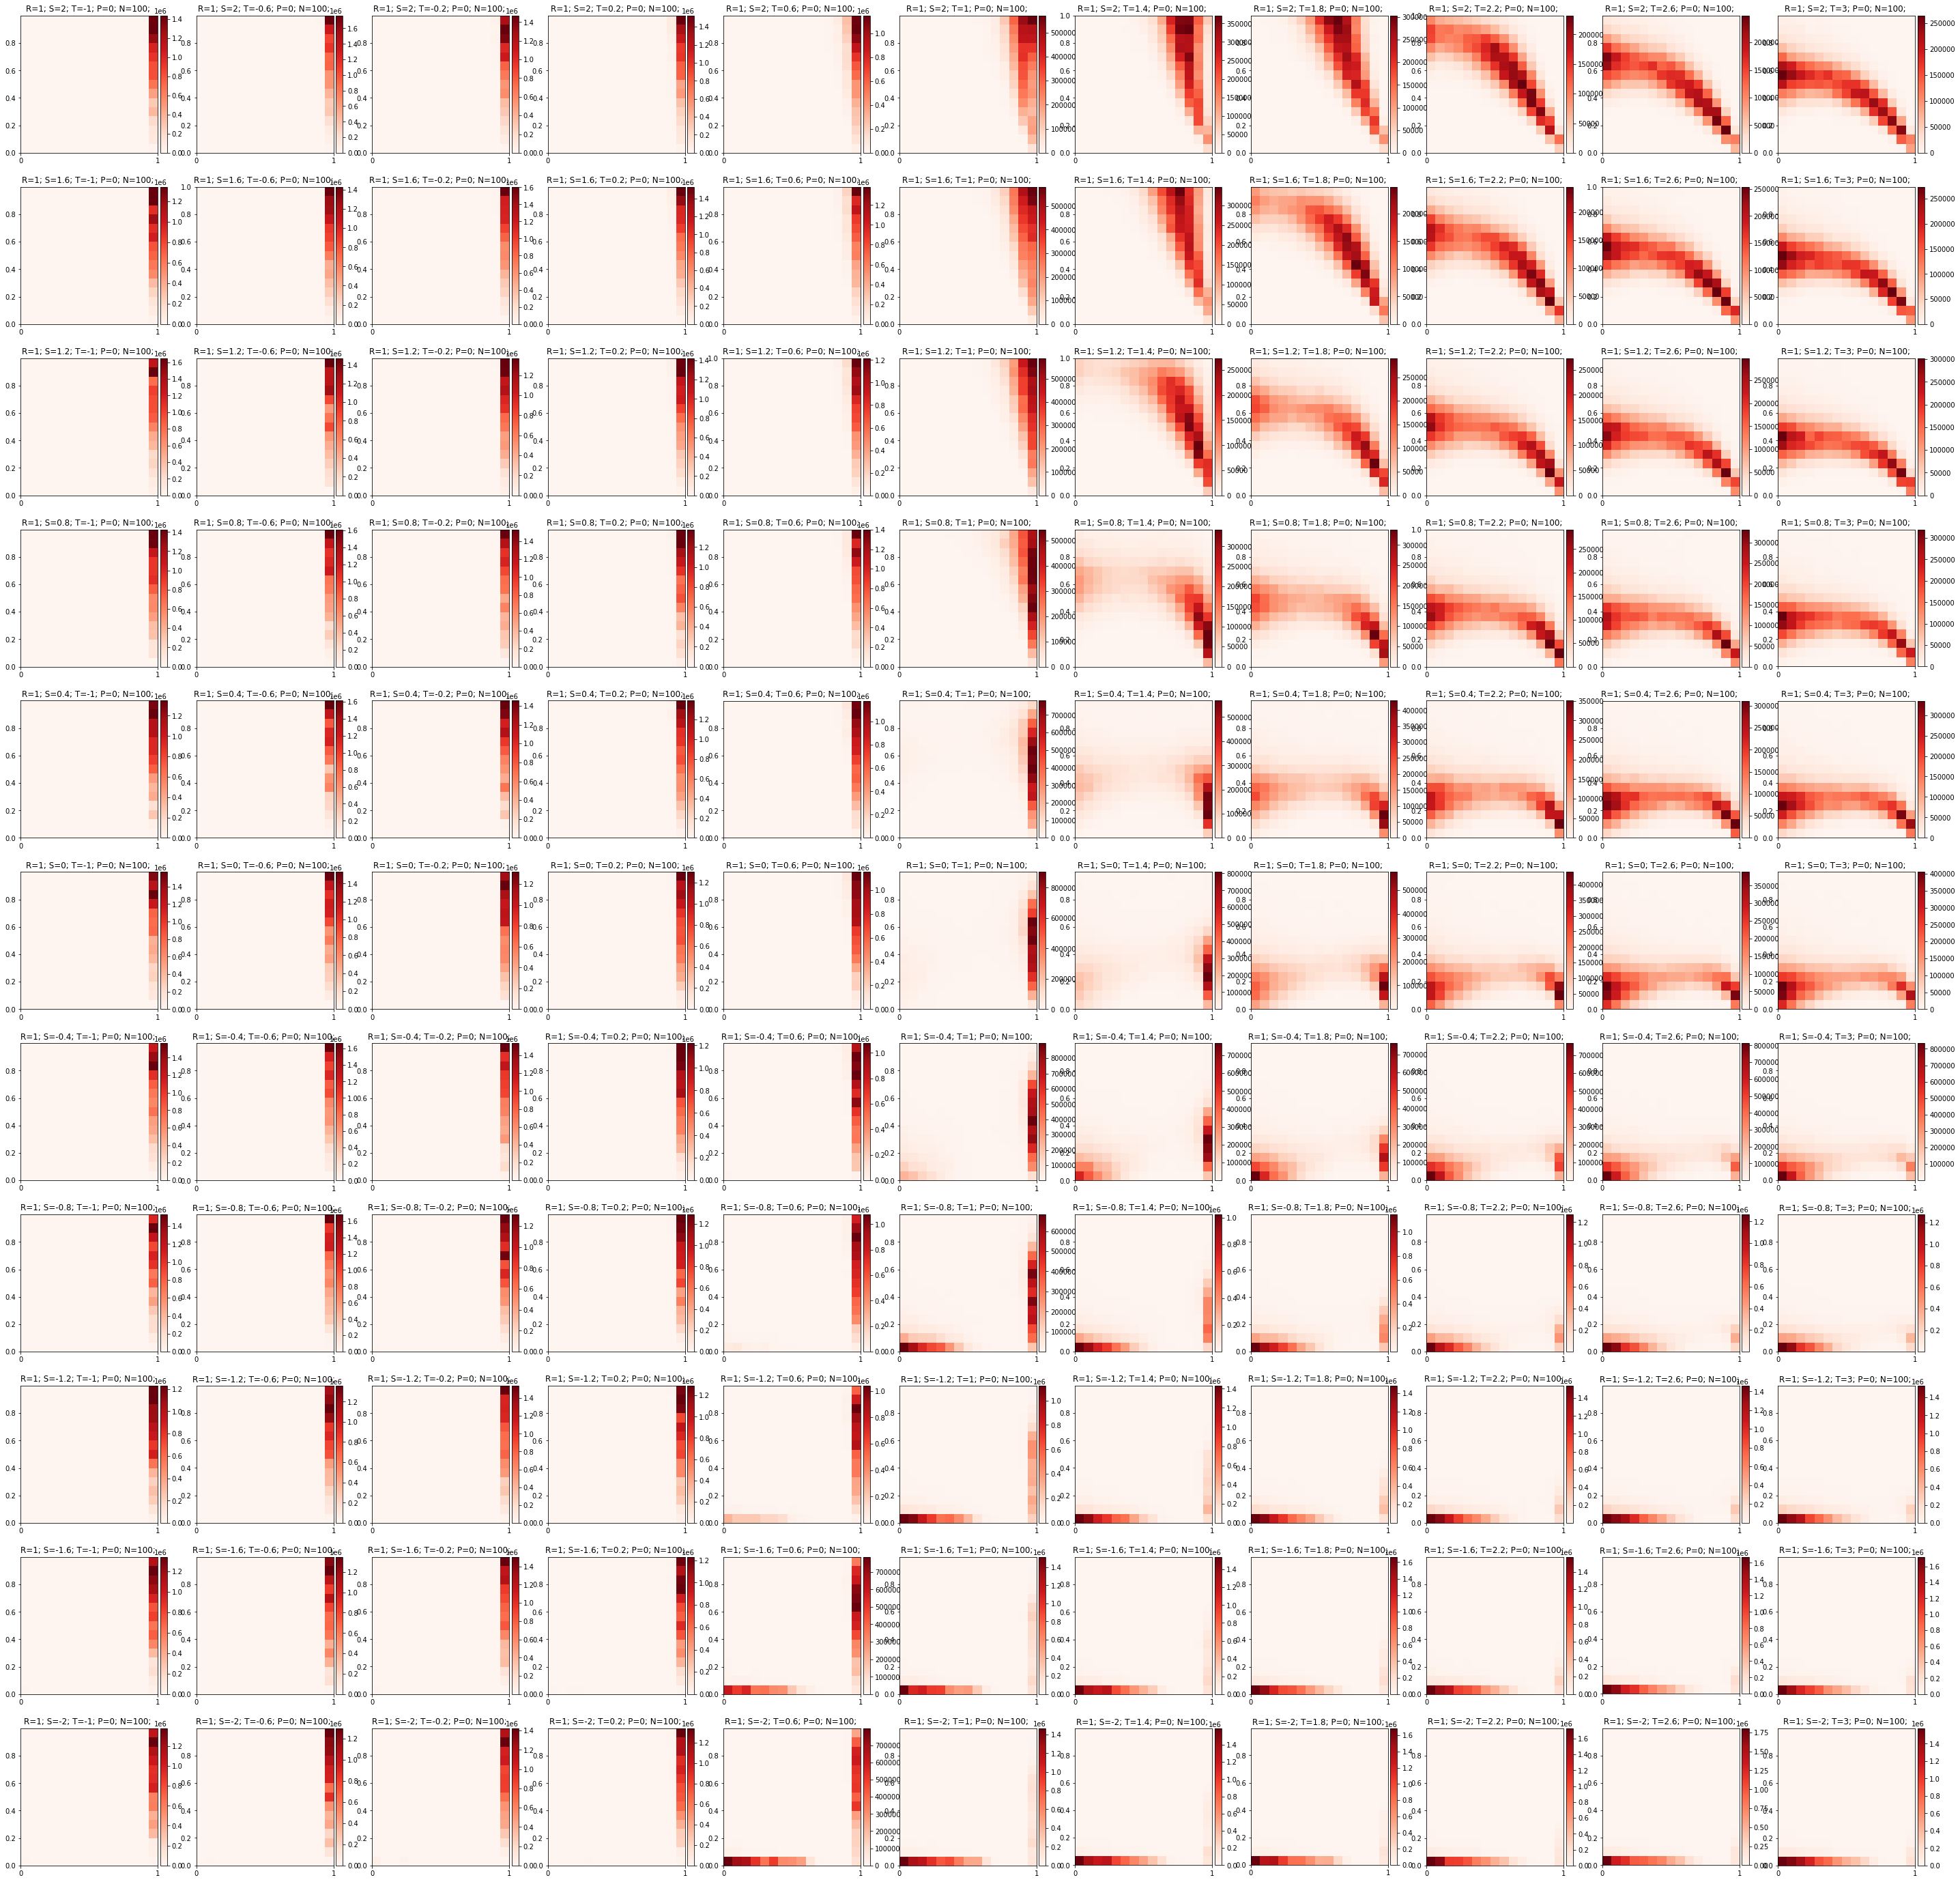

In [20]:
fig, axes = plt.subplots(nrows=11, ncols=11, figsize=(50, 50));

for i, file in enumerate(sorted_cvs_files_stochastic):
    
    df = pd.read_csv(file, dtype=np.float64)
    
    text_file = open((file[:23] + file[29:]).replace("csv", "txt"), "r")
    data = text_file.readlines()
    
    ps, qs = [], []
    for p, q, v in zip(df["p"], df["q"], df["frequencies"]):
        for _ in range(int(v)):
            ps.append(p)
            qs.append(q)
    
    title = data[0].replace(",", "")[:-35]
    
    index = (int(i / 11), i % 11)
    
    heatmap, xedges, yedges = np.histogram2d(ps, qs, bins=15)

    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

    im = axes[index].imshow(heatmap.T, extent=extent, cmap=cmaps[1], origin="lower")

    divider = make_axes_locatable(axes[index])
    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(im, cax=cax, orientation='vertical')
    axes[index].set_title(title)

    axes[index].set_xticks(np.linspace(0, 1, 2))
    
fig.savefig("matlab/images/merged_plot_stochastic.pdf")

**For Harmony Game**

In [21]:
Ss_harmony = [0.4, 0.8, 1.2, 1.6, 2 ]
Ts_harmony = [-1, -0.6, -0.2,  0.2,  0.6,  1]

In [25]:
cooperation_rates_harmony = np.zeros((len(Ss_harmony), len(Ts_harmony)))

In [26]:
harmony_cvs_files = [f"matlab/data/stochastic/clean_S_{S}_T_{T}_stochastic_1.csv" for S in Ss for T in Ts]

In [31]:
# for i, file in enumerate(harmony_cvs_files):
#     x = int(i / 6)
#     y = i % 6
#     df = dd.read_csv(file)
    
#     cooperation_rates_harmony[x, y] = sum(df['average cooperation rate'] * (df['frequencies'] / 10 ** 7))

In [ ]:
plt.imshow(cooperation_rates_harmony, cmap=cmaps[1], origin="lower")

plt.colorbar();

In [28]:
from pylab import meshgrid

In [29]:
def harmony_payoffs_in_example(x, p):
    return 2 * x * (1 - p) + p

In [30]:
x = np.linspace(0, 1, 100)
p = np.linspace(0, 1, 100)

In [89]:
X, Y = meshgrid(x, p)

In [91]:
Z = harmony_payoffs_in_example(X, Y)

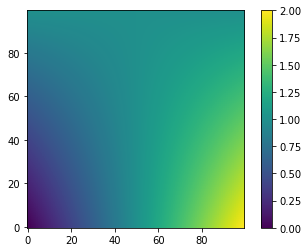

In [97]:
plt.imshow(Z, origin="lower");

plt.colorbar();

**Cooperation in stochastic**

In [34]:
cooperation_rates_stoch = np.zeros((11, 11))
scores_stoch = np.zeros((11, 11))

In [36]:
for i, file in enumerate(sorted_cvs_files_stochastic):
    x = int(i / 11)
    y = i % 11
    
    df = dd.read_csv(file)
    
    cooperation_rates_stoch[x, y] = sum(df['average cooperation rate'] * (df['frequencies'] / 10 ** 7))
    scores_stoch[x, y] = sum(df['average score'] * (df['frequencies'] / 10 ** 7))

In [37]:
cooperation_difference = cooperation_rates_expected - cooperation_rates_stoch

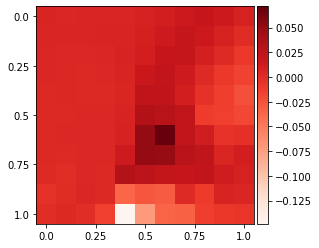

In [39]:
fig, axes = plt.subplots()

im = axes.imshow(cooperation_difference, cmap=cmaps[1])

axes.set_xticks(np.linspace(0, 10, 5))
axes.set_yticks(np.linspace(0, 10, 5))

axes.set_xticklabels(np.linspace(0, 1, 5))
axes.set_yticklabels(np.linspace(0, 1, 5))



divider = make_axes_locatable(axes)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im, cax=cax, orientation='vertical');

**Round Two**

In [21]:
csv_files = glob.glob('matlab/data/round_two/S*csv')

In [22]:
columns = ['y', 'p', 'q', "average cooperation rate", 't']

In [23]:
csv_files = glob.glob('matlab/data/round_two/S*csv')

for file in tqdm.tqdm_notebook(csv_files):    
    df = pd.read_csv(file, header=None)
    df = df.drop_duplicates()
    df.columns = columns
    
    frequencies = []
    previous = 0
    for value in df['t'][1:]:
        frequencies.append(value - previous)
        previous = value
    frequencies.append(10 ** 7 - previous)
    
    df['frequencies'] = frequencies
    
    df.to_csv(f"matlab/data/round_two/clean_{file[22:]}", index=False)

/Users/glynatsi/opt/anaconda3/envs/stochastic-payoffs/lib/python3.7/site-packages/ipykernel_launcher.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  This is separate from the ipykernel package so we can avoid doing imports until


In [24]:
sorted_cvs_files = [f"matlab/data/round_two/clean_S_{S}_T_{T}.csv" for S in Ss for T in Ts]

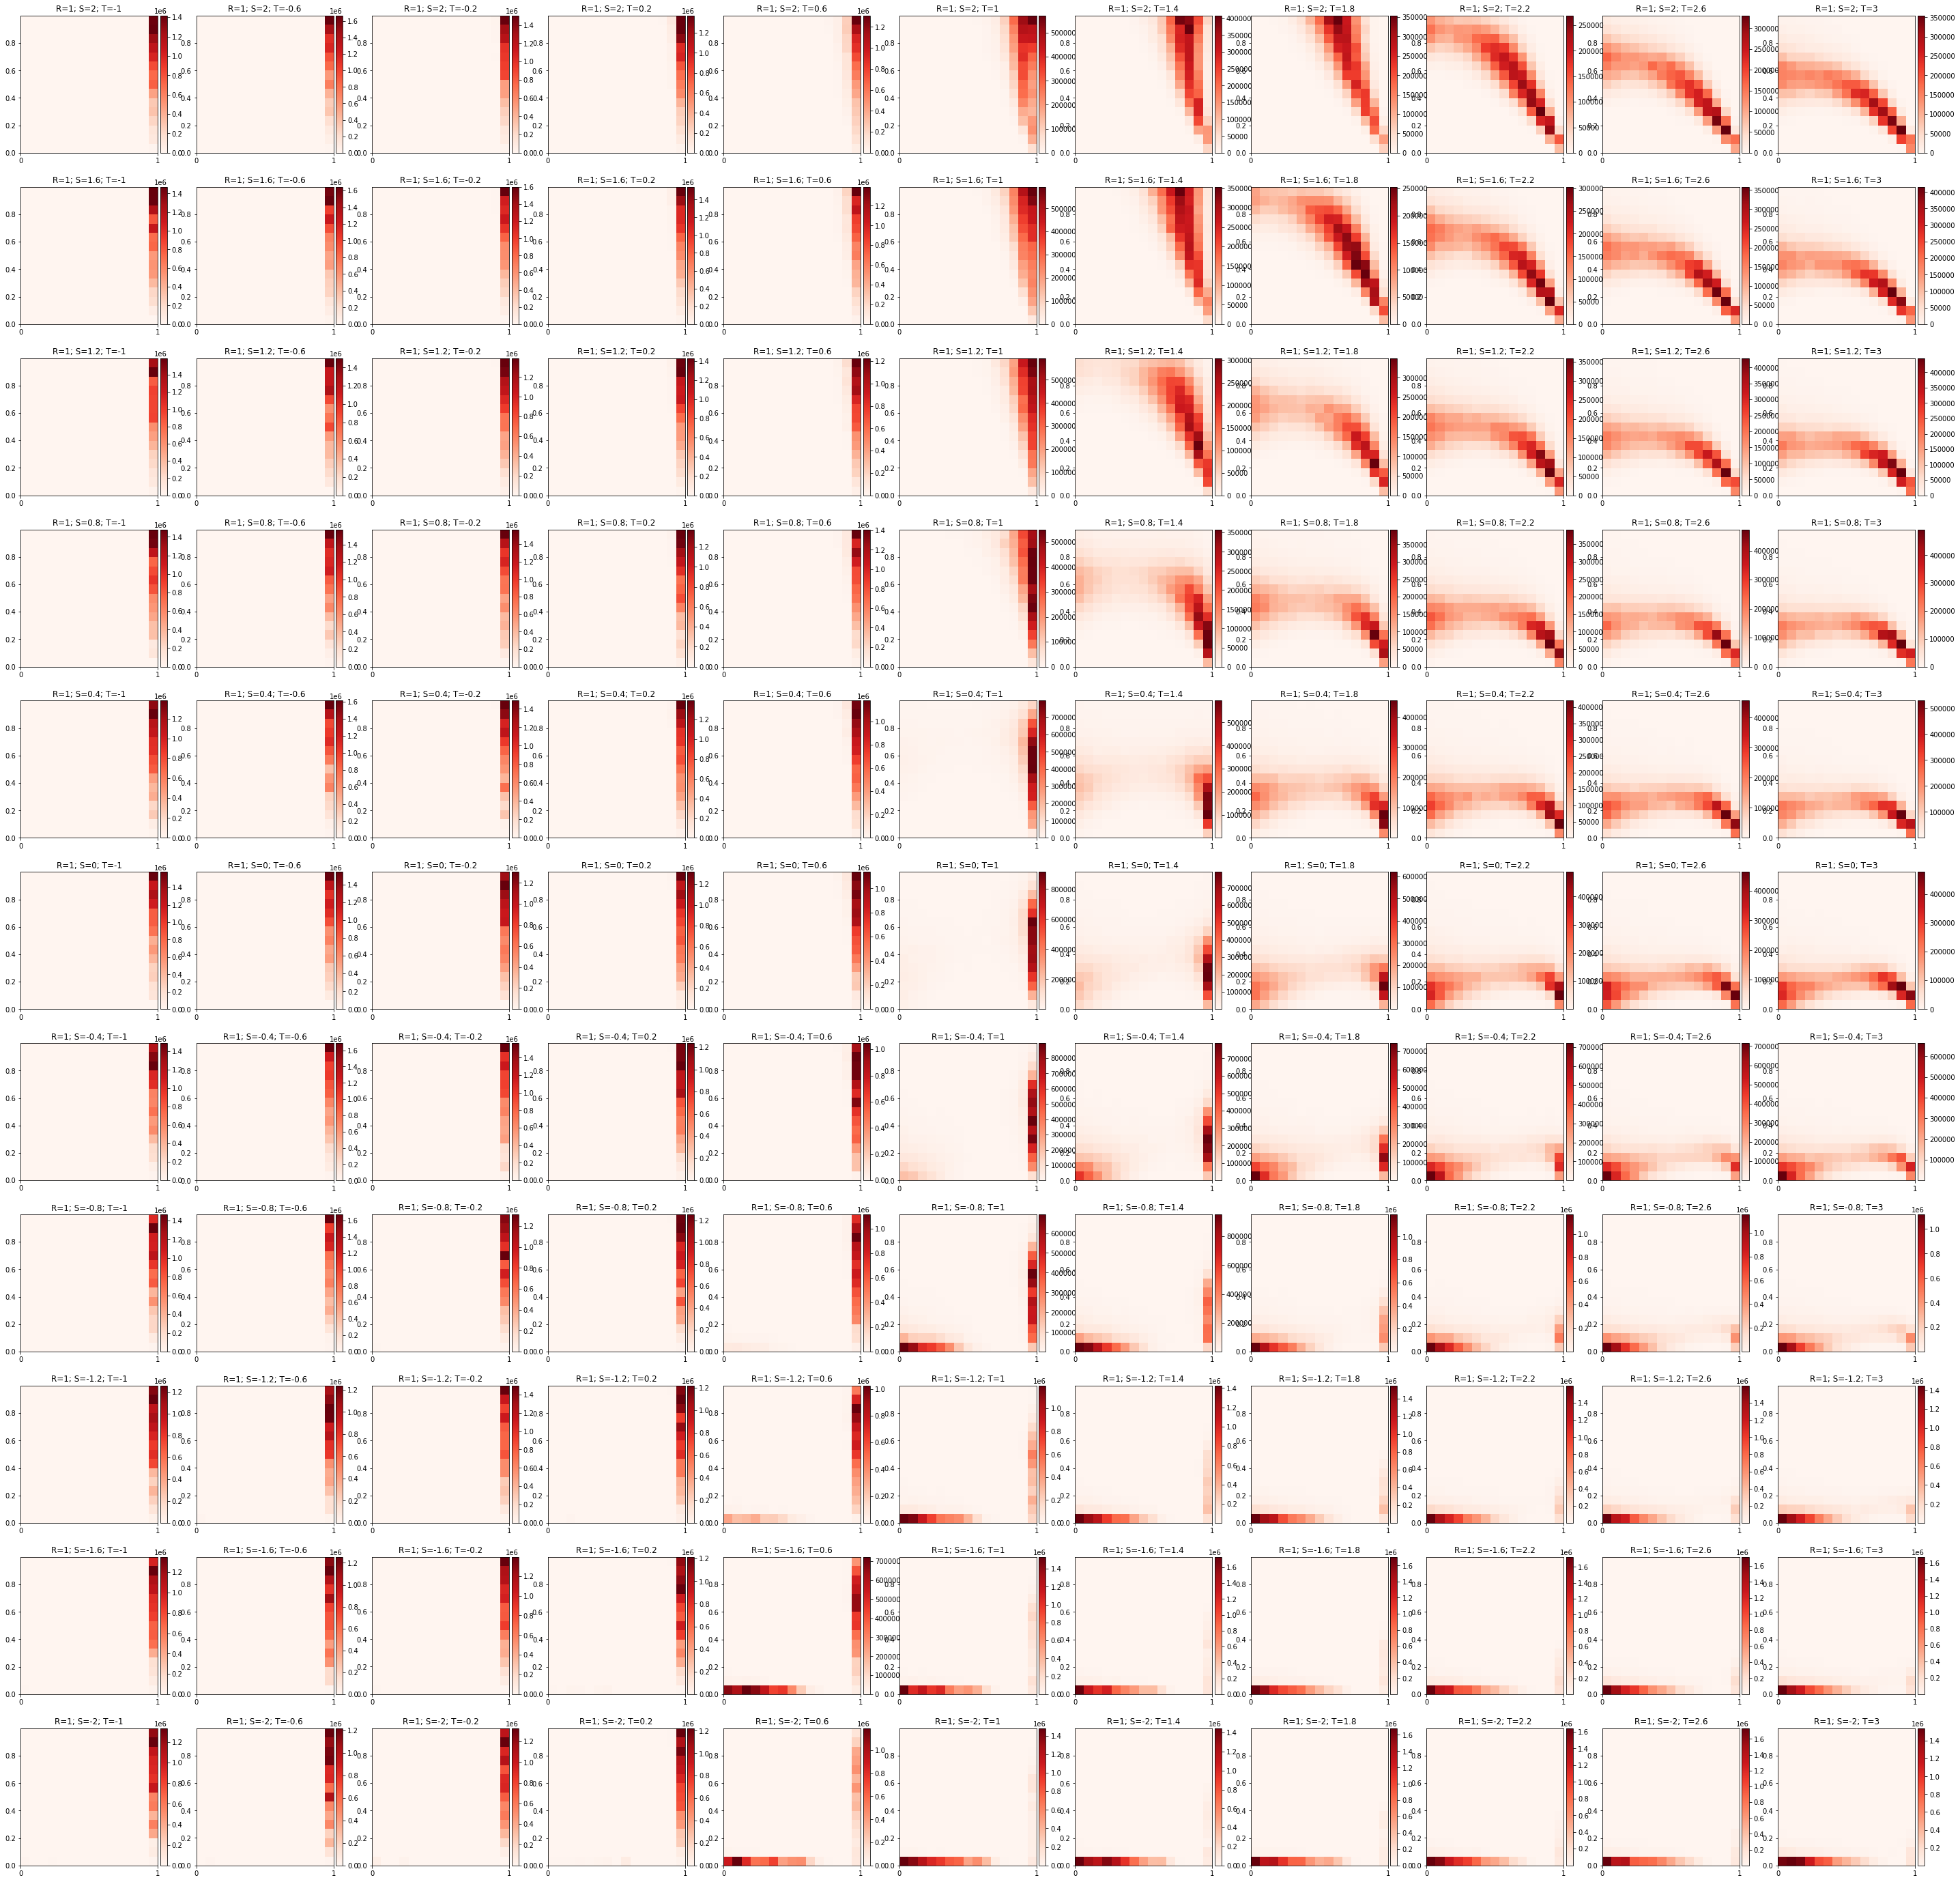

In [25]:
fig, axes = plt.subplots(nrows=11, ncols=11, figsize=(50, 50));

for i, file in enumerate(sorted_cvs_files):
    
    df = pd.read_csv(file, dtype=np.float64)
    
    text_file = open((file[:22] + file[28:]).replace("csv", "txt"), "r")
    data = text_file.readlines()
    
    ps, qs = [], []
    for p, q, v in zip(df["p"], df["q"], df["frequencies"]):
        for _ in range(int(v)):
            ps.append(p)
            qs.append(q)
    
    title = data[0].replace(",", "")[:-35]
    
    index = (int(i / 11), i % 11)
    
    heatmap, xedges, yedges = np.histogram2d(ps, qs, bins=15)

    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

    im = axes[index].imshow(heatmap.T, extent=extent, cmap=cmaps[1], origin="lower")

    divider = make_axes_locatable(axes[index])
    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(im, cax=cax, orientation='vertical')
    axes[index].set_title(title)

    axes[index].set_xticks(np.linspace(0, 1, 2))
    

fig.savefig("matlab/images/merged_plot_rounds_two.pdf")

In [26]:
cooperation_rates_stoch = np.zeros((11, 11))
scores_stoch = np.zeros((11, 11))

In [27]:
for i, file in enumerate(sorted_cvs_files):
    x = int(i / 11)
    y = i % 11
    
    df = dd.read_csv(file)
    
    cooperation_rates_stoch[x, y] = sum(df['average cooperation rate'] * (df['frequencies'] / 10 ** 7))
#     scores_stoch[x, y] = sum(df['average score'] * (df['frequencies'] / 10 ** 7))

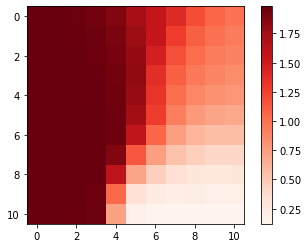

In [28]:
plt.imshow(cooperation_rates_stoch, cmap=cmaps[1])

plt.colorbar();

**Opponents**

In [29]:
columns = ["y", "p", "q", "average cooperation rate", "average score", "t",]

In [36]:
csv_files = glob.glob('matlab/data/opponents_two/*csv')

In [37]:
for file in tqdm.tqdm_notebook(csv_files):    
    df = pd.read_csv(file, header=None)
    df = df.drop_duplicates()
    df.columns = columns
    
    frequencies = []
    previous = 0
    for value in df['t'][1:]:
        frequencies.append(value - previous)
        previous = value
    frequencies.append(10 ** 7 - previous)
    
    df['frequencies'] = frequencies
    
    df.to_csv(f"matlab/data/opponents_two/clean_{file[26:]}", index=False)

/Users/glynatsi/opt/anaconda3/envs/stochastic-payoffs/lib/python3.7/site-packages/ipykernel_launcher.py:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """Entry point for launching an IPython kernel.


In [38]:
sorted_cvs_files = [f"matlab/data/opponents_two/clean_S_{S}_T_{T}.csv" for S in Ss for T in Ts]

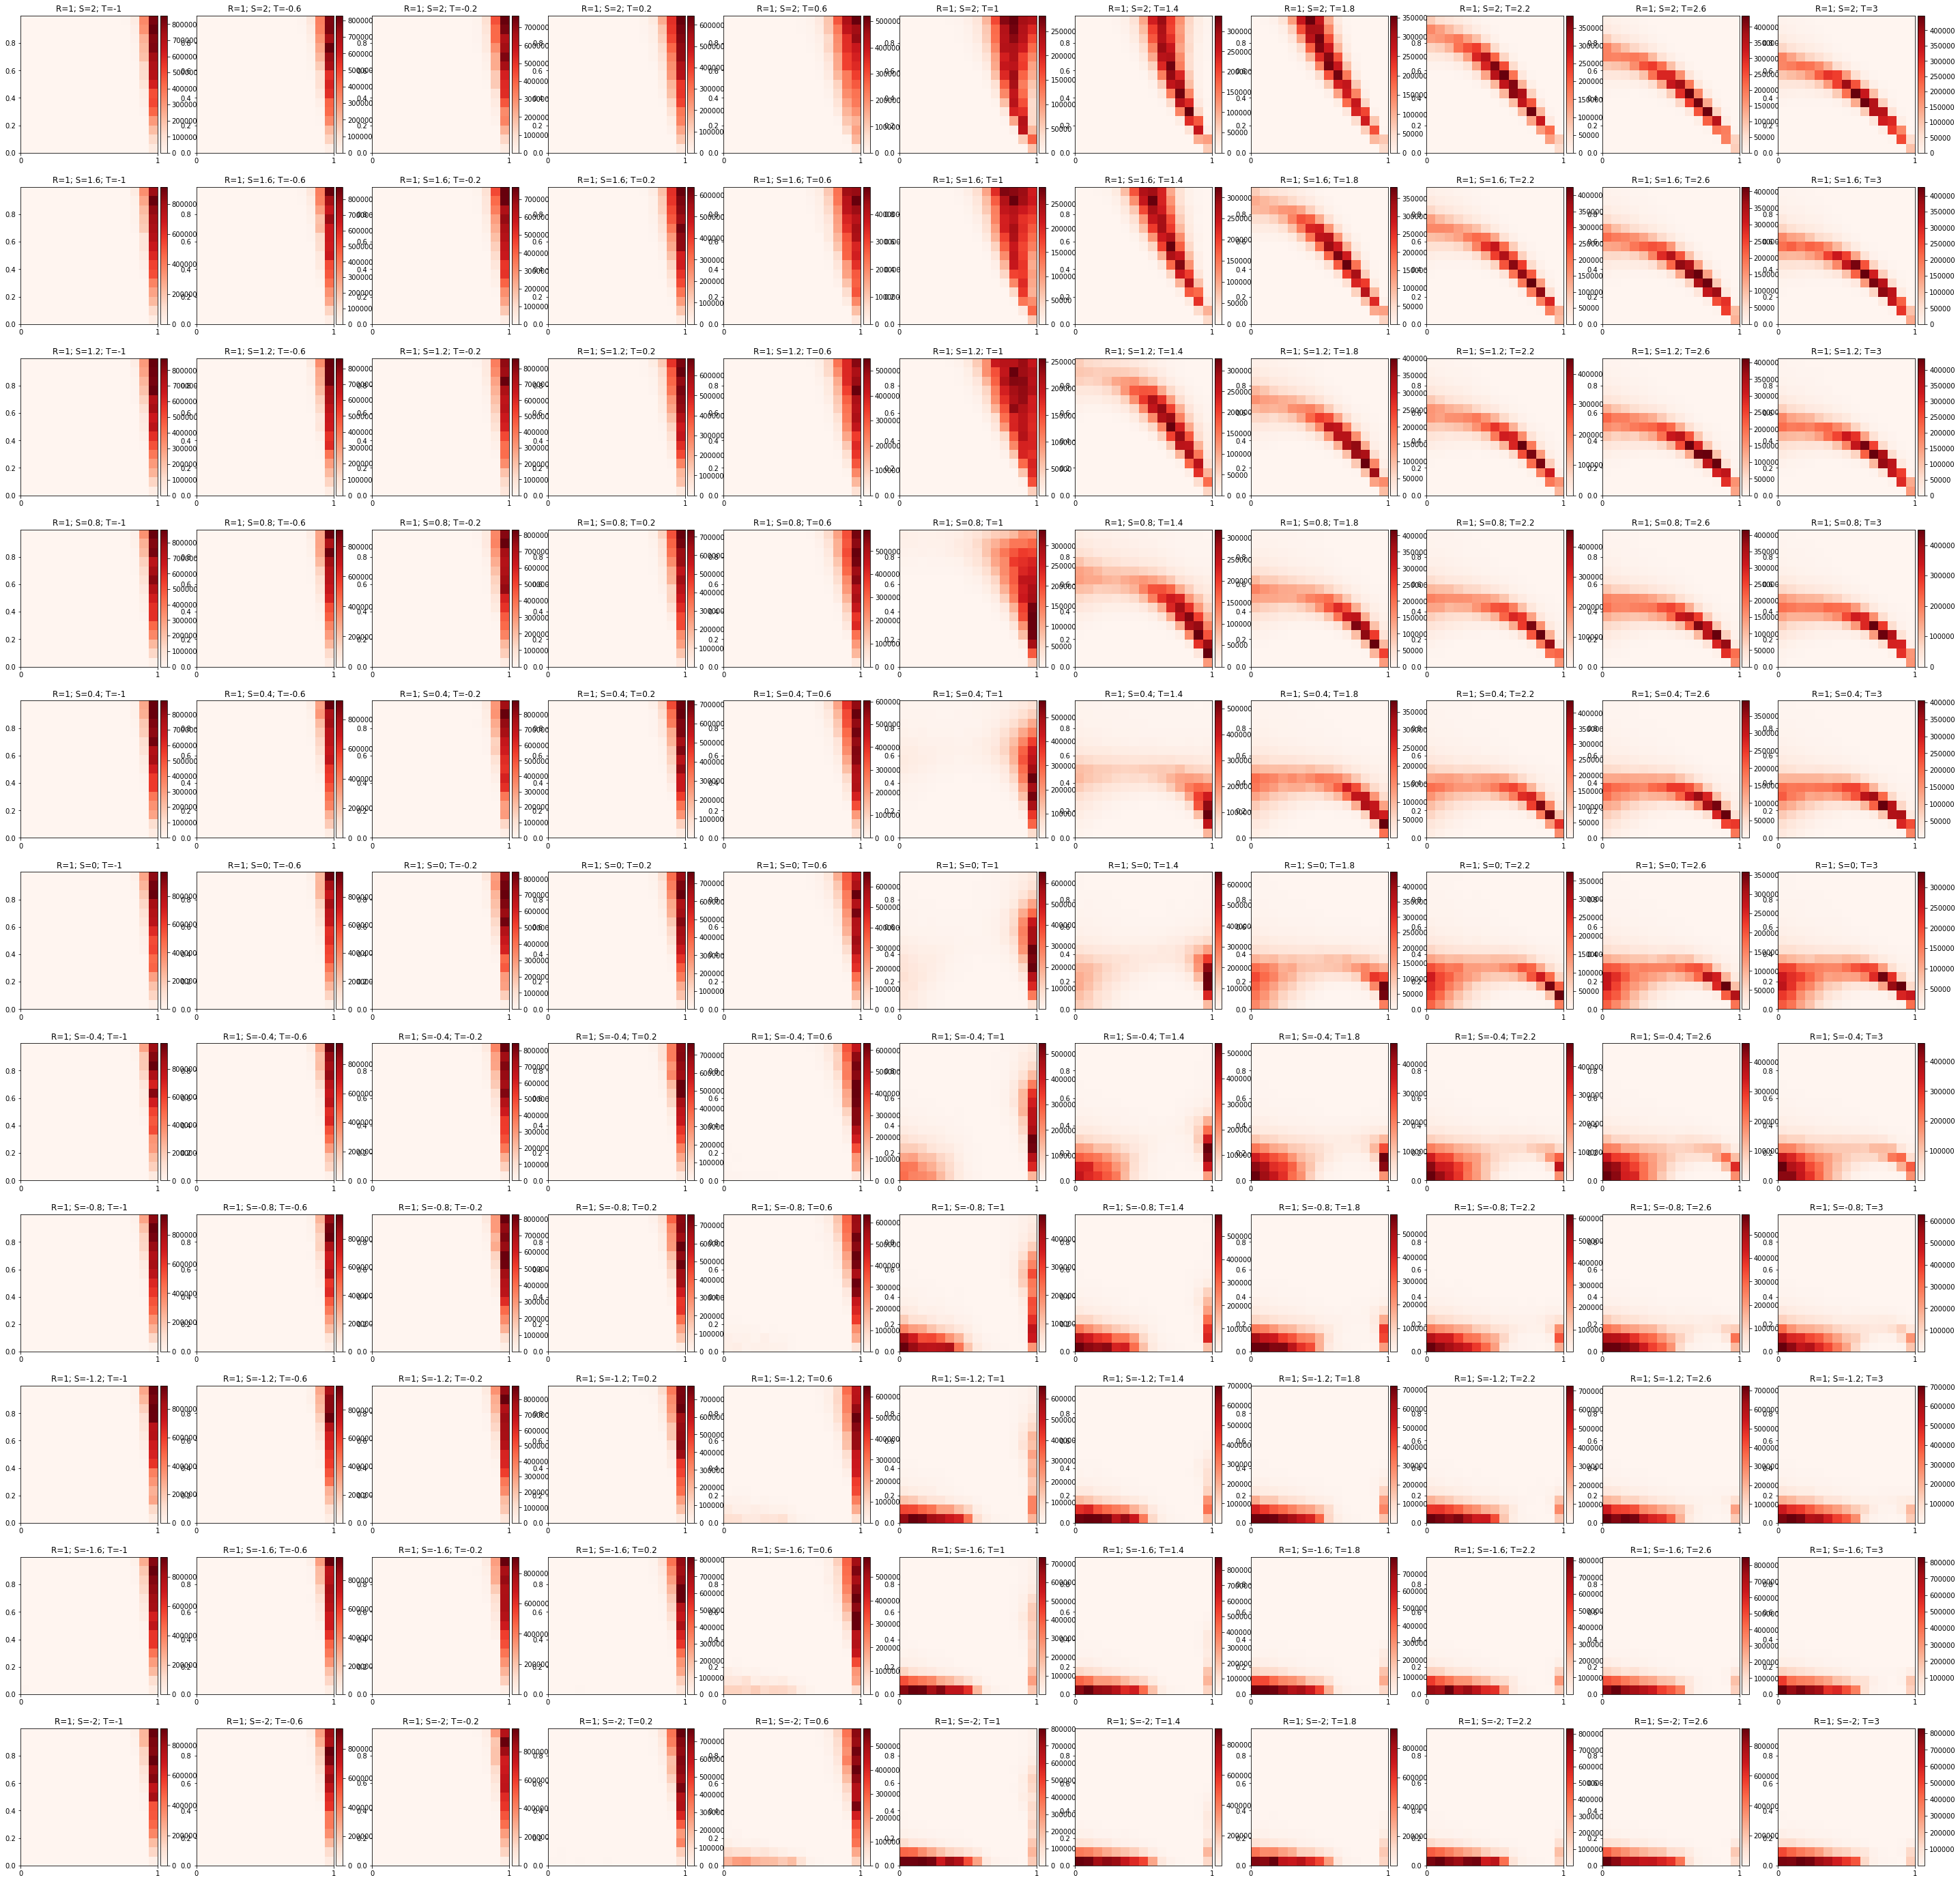

In [39]:
fig, axes = plt.subplots(nrows=11, ncols=11, figsize=(50, 50));

for i, file in enumerate(sorted_cvs_files):
    
    df = pd.read_csv(file, dtype=np.float64)
    
    text_file = open((file[:26] + file[32:]).replace("csv", "txt"), "r")
    data = text_file.readlines()
    
    ps, qs = [], []
    for p, q, v in zip(df["p"], df["q"], df["frequencies"]):
        for _ in range(int(v)):
            ps.append(p)
            qs.append(q)
    
    title = data[0].replace(",", "")[:-35]
    
    index = (int(i / 11), i % 11)
    
    heatmap, xedges, yedges = np.histogram2d(ps, qs, bins=15)

    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

    im = axes[index].imshow(heatmap.T, extent=extent, cmap=cmaps[1], origin="lower")

    divider = make_axes_locatable(axes[index])
    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(im, cax=cax, orientation='vertical')
    axes[index].set_title(title)

    axes[index].set_xticks(np.linspace(0, 1, 2))
    

fig.savefig("matlab/images/merged_plot_opponents_two.pdf")

In [215]:
cooperation_rates_stoch = np.zeros((11, 11))

In [216]:
for i, file in enumerate(sorted_cvs_files):
    x = int(i / 11)
    y = i % 11
    
    df = dd.read_csv(file)
    
    cooperation_rates_stoch[x, y] = sum(df['average cooperation rate'] * (df['frequencies'] / 10 ** 7))
#     scores_stoch[x, y] = sum(df['average score'] * (df['frequencies'] / 10 ** 7))

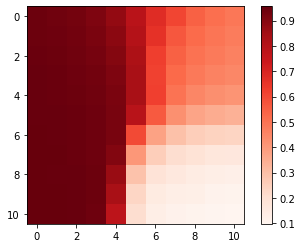

In [217]:
plt.imshow(cooperation_rates_stoch, cmap=cmaps[1])

plt.colorbar();

**Rounds - opponents**

In [17]:
csv_files = glob.glob('matlab/data/rounds_opponents_two/S*csv')

In [18]:
columns = ['y', 'p', 'q', "average cooperation rate", 't']

In [20]:
# for file in tqdm.tqdm_notebook(csv_files):    
#     df = pd.read_csv(file, header=None)
#     df = df.drop_duplicates()
#     df.columns = columns
    
#     frequencies = []
#     previous = 0
#     for value in df['t'][1:]:
#         frequencies.append(value - previous)
#         previous = value
#     frequencies.append(10 ** 7 - previous)
    
#     df['frequencies'] = frequencies
    
#     df.to_csv(f"matlab/data/rounds_opponents_two/clean_{file[33:]}", index=False)

In [ ]:
sorted_cvs_files = [f"matlab/data/rounds_opponents_two/clean_S_{S}_T_{T}.csv" for S in Ss for T in Ts]

In [ ]:
fig, axes = plt.subplots(nrows=11, ncols=11, figsize=(50, 50));

for i, file in enumerate(sorted_cvs_files):
    
    try:
        df = dd.read_csv(file)
        
        text_file = open(file.replace("csv", "txt").replace("clean_", ""), "r")
        data = text_file.readlines()

        ps = df['p'].values.compute()
        qs = df['q'].values.compute()
        title = data[0].replace(",", "")[:-29]

        index = (int(i / 11), i % 11)

        heatmap, xedges, yedges = np.histogram2d(ps, qs, bins=15)

        extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

        im = axes[index].imshow(heatmap.T, extent=extent, cmap=cmaps[1], origin="lower")

        divider = make_axes_locatable(axes[index])
        cax = divider.append_axes('right', size='5%', pad=0.05)
        fig.colorbar(im, cax=cax, orientation='vertical')
        axes[index].set_title(title)

        axes[index].set_xticks(np.linspace(0, 1, 2))
        axes[index].set_yticks(np.linspace(0, 1, 2))
    
    except FileNotFoundError:
        pass
    

fig.savefig("matlab/images/merged_plot_rounds_opponents_two.pdf")